(180, 187)

45
135
62
124
row=186, column=90
13.67447024492234
y=ax+b的 a係數: [[0.44955737]]
y=ax+b的 b截距: [121.02846442]


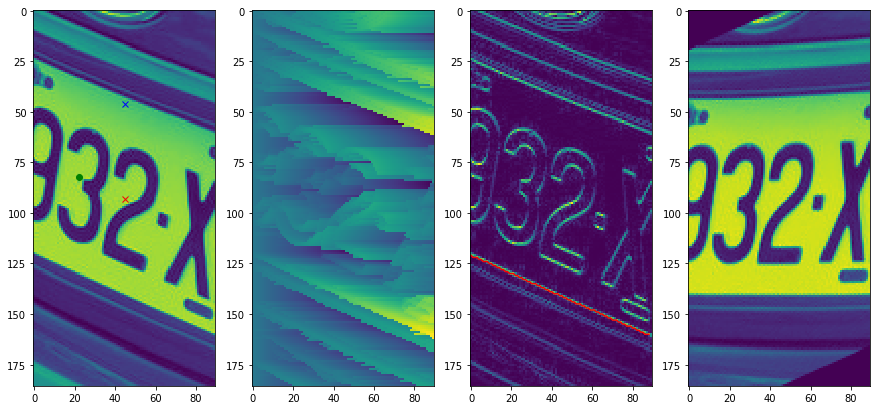

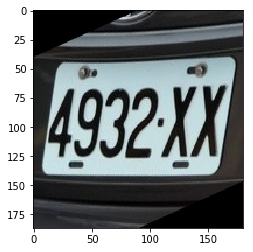

(59, 58)

14
44
19
38
row=57, column=30
13.389801812865496
y=ax+b的 a係數: [[-0.5679803]]
y=ax+b的 b截距: [51.8137931]


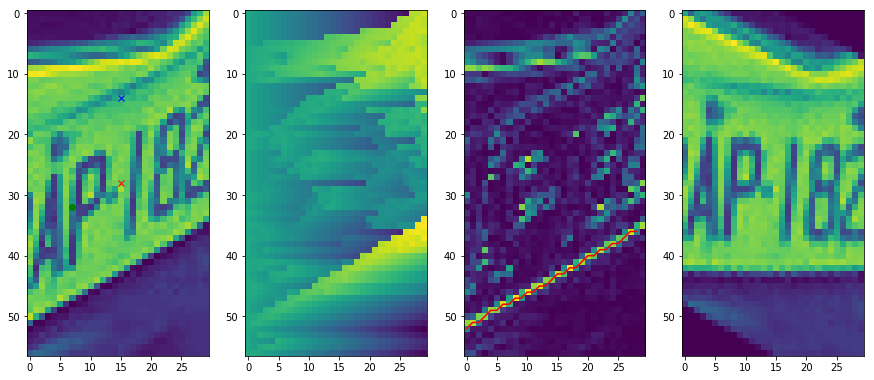

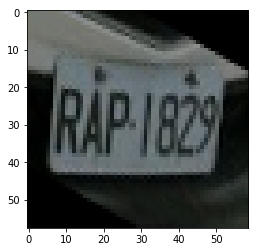

(59, 58)

14
44
19
38
row=57, column=30
23.329039298245615
y=ax+b的 a係數: [[0.42364532]]
y=ax+b的 b截距: [6.55172414]


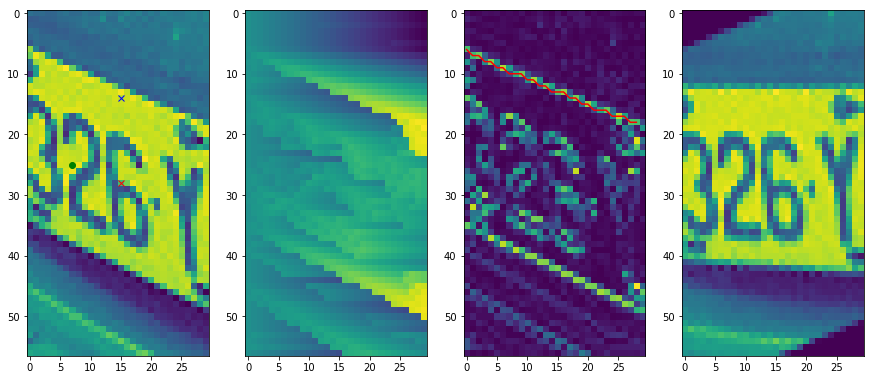

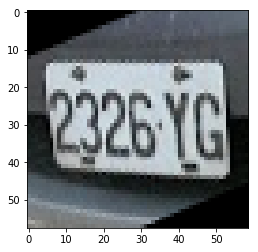

(209, 165)

52
156
55
110
row=164, column=104
16.862901225375236
y=ax+b的 a係數: [[0.11546149]]
y=ax+b的 b截距: [17.58719193]


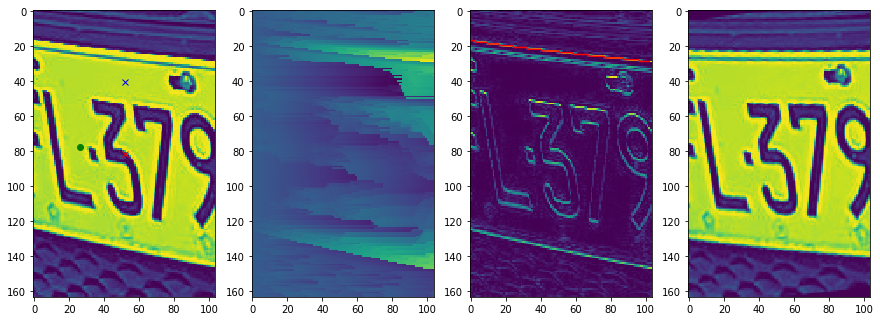

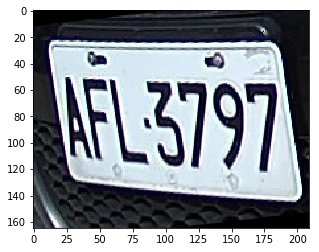

(63, 69)

15
47
23
46
row=68, column=32
24.134093290441175
y=ax+b的 a係數: [[-0.45483871]]
y=ax+b的 b截距: [67.72580645]


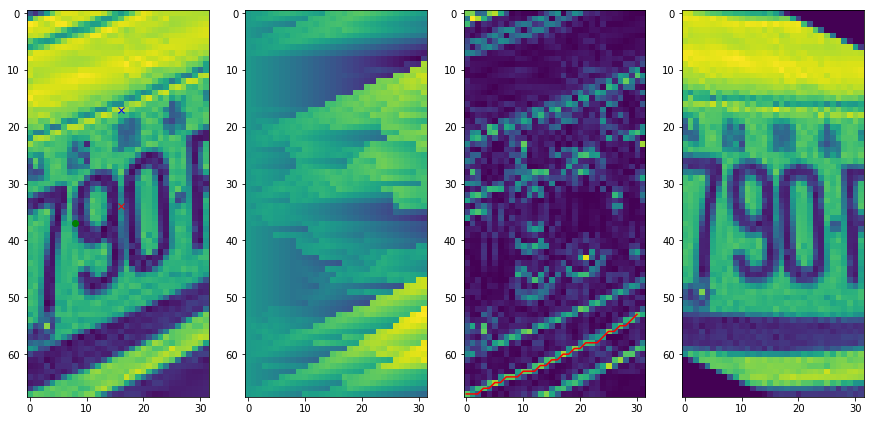

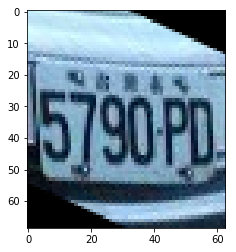

(66, 49)

16
49
16
32
row=48, column=33
29.83191142676767
y=ax+b的 a係數: [[0.26759531]]
y=ax+b的 b截距: [7.91477273]


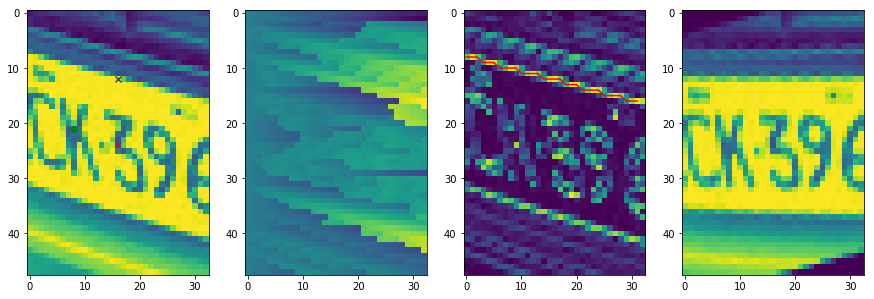

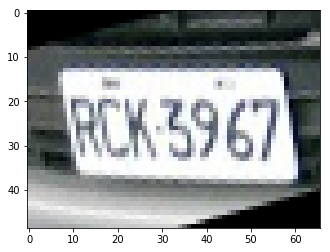

(135, 73)

33
101
24
48
row=72, column=68
3.457424019607843
y=ax+b的 a係數: [[-0.04381834]]
y=ax+b的 b截距: [5.90869183]


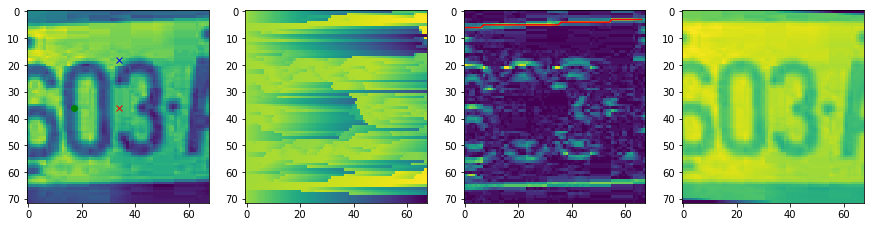

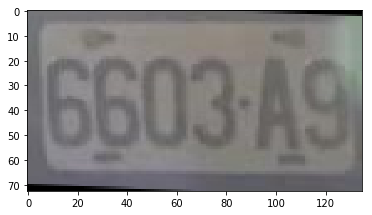

(147, 117)

36
110
39
78
row=116, column=74
17.120522413793104
y=ax+b的 a係數: [[0.25376404]]
y=ax+b的 b截距: [3.87819326]


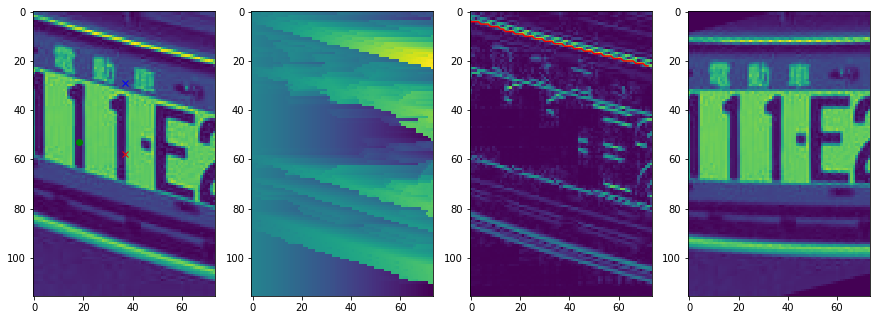

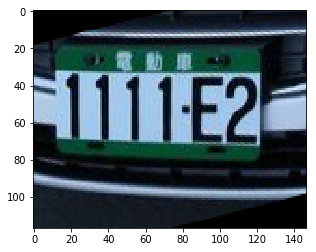

(107, 83)

26
80
27
55
row=82, column=54
29.442222131887984
y=ax+b的 a係數: [[0.16045799]]
y=ax+b的 b截距: [7.97903564]


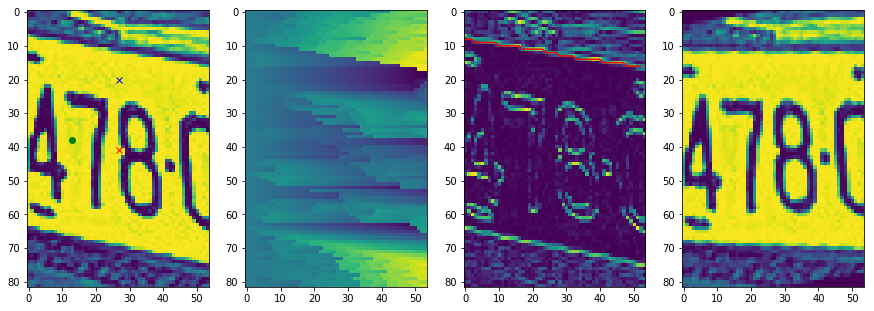

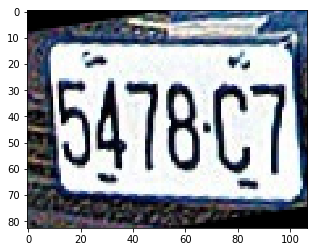

(173, 86)

43
129
28
57
row=85, column=86
7.609362106703147
y=ax+b的 a係數: [[-0.03494235]]
y=ax+b的 b截距: [8.38522572]


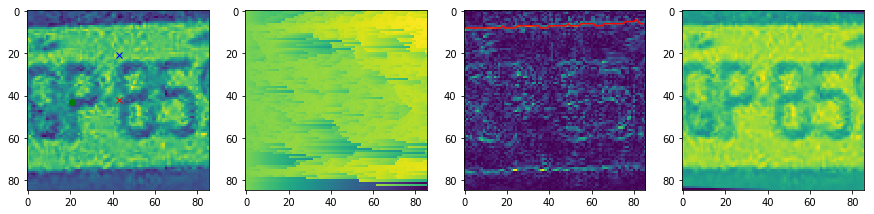

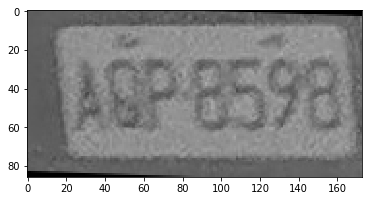

(81, 62)

20
60
20
41
row=61, column=40
21.682661926229507
y=ax+b的 a係數: [[0.34048583]]
y=ax+b的 b截距: [4.73589744]


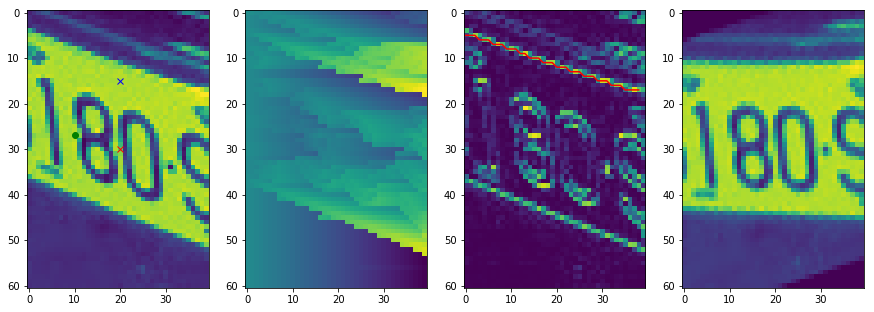

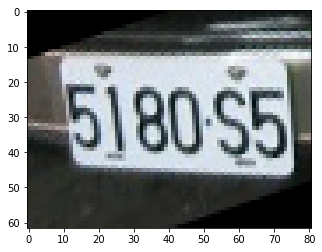

(143, 90)

35
107
30
60
row=89, column=72
13.577632865168539
y=ax+b的 a係數: [[0.15801476]]
y=ax+b的 b截距: [59.63849765]


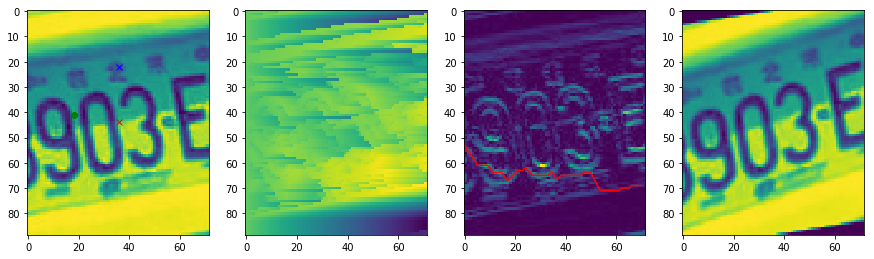

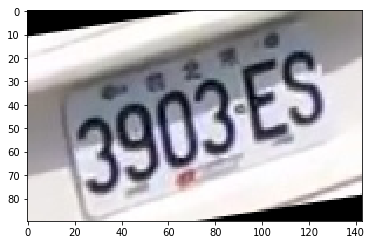

(70, 60)

17
52
20
40
row=59, column=35
17.528866440677966
y=ax+b的 a係數: [[-0.50603514]]
y=ax+b的 b截距: [51.82016807]


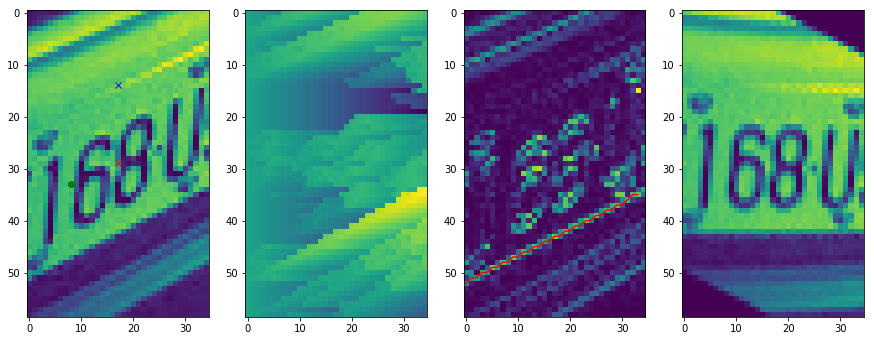

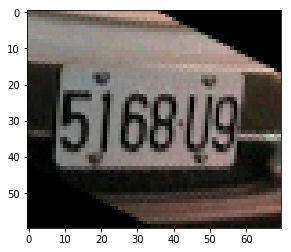

(172, 119)

43
129
39
79
row=118, column=86
11.80213819471817
y=ax+b的 a係數: [[-0.21504788]]
y=ax+b的 b截距: [30.26730506]


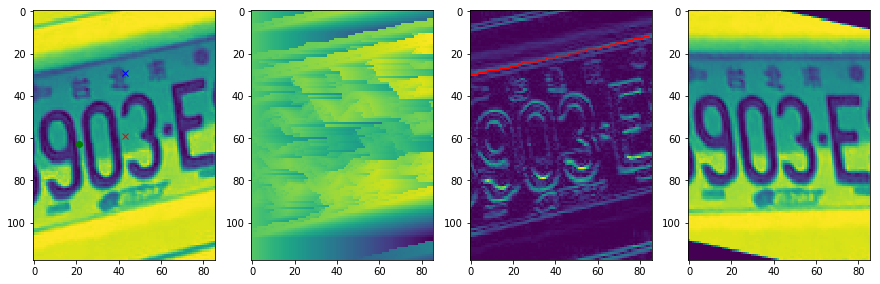

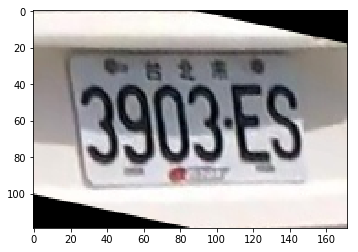

(146, 78)

36
109
26
52
row=77, column=73
6.837505390499911
y=ax+b的 a係數: [[-0.01440607]]
y=ax+b的 b截距: [69.2891933]


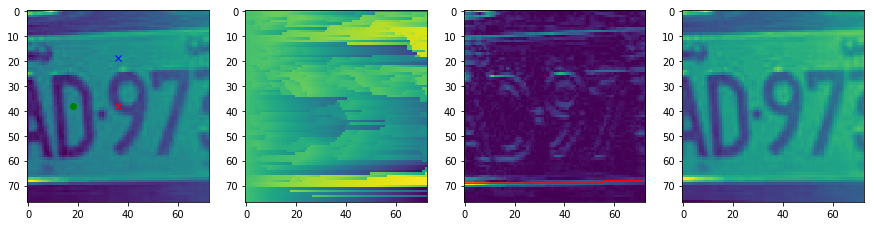

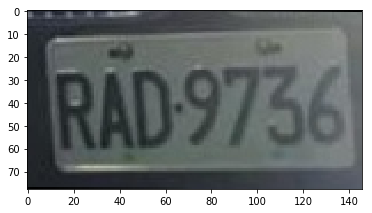

(72, 63)

18
54
21
42
row=62, column=36
24.689397670250894
y=ax+b的 a係數: [[-0.45266106]]
y=ax+b的 b截距: [48.20952381]


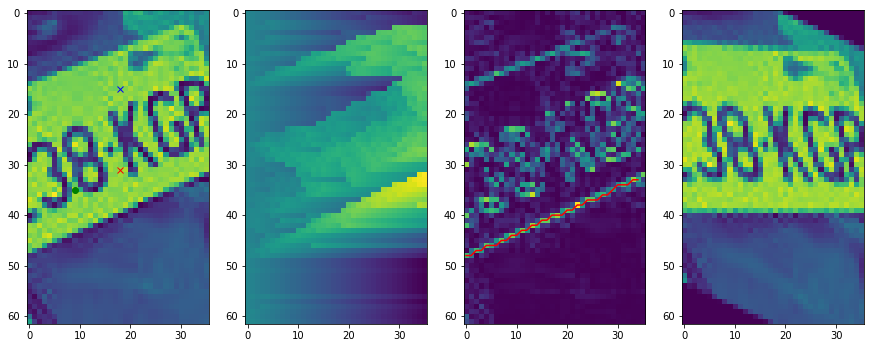

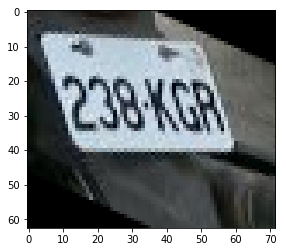

(162, 167)

40
121
55
111
row=166, column=81
8.894820667856612
y=ax+b的 a係數: [[-0.42852789]]
y=ax+b的 b截距: [55.00185185]


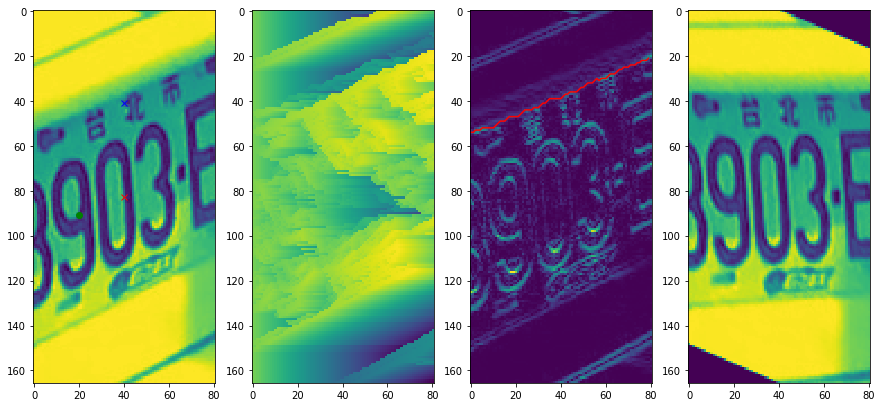

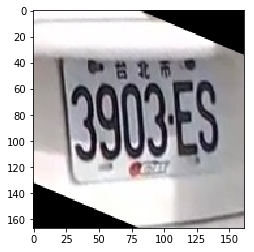

(144, 91)

36
108
30
60
row=90, column=72
30.04665438271605
y=ax+b的 a係數: [[0.10741113]]
y=ax+b的 b截距: [69.76173709]


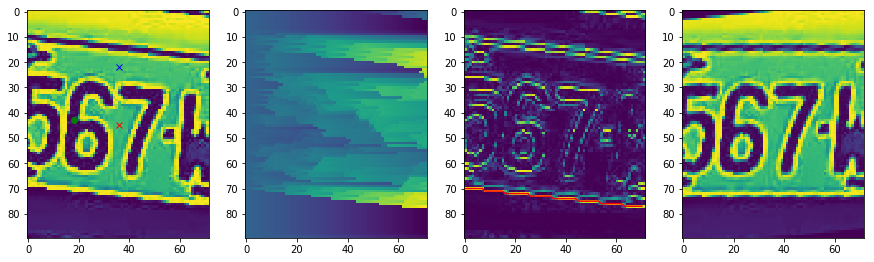

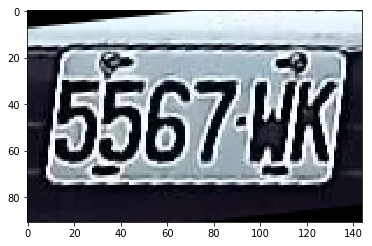

(66, 53)

16
49
17
35
row=52, column=33
18.787364627039626
y=ax+b的 a係數: [[-0.42412023]]
y=ax+b的 b截距: [19.69886364]


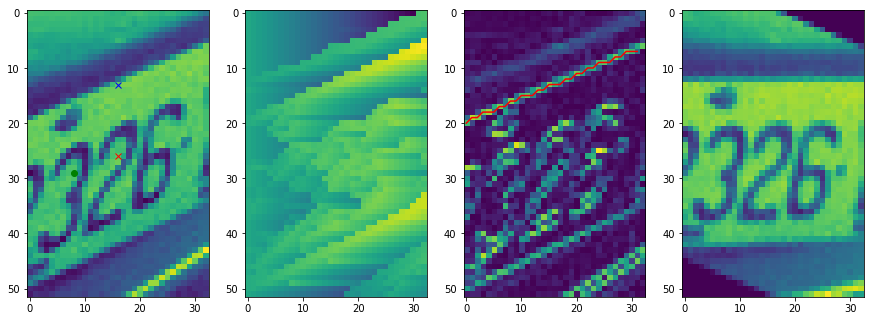

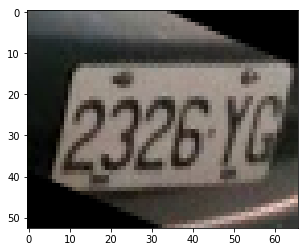

(51, 47)

12
38
15
31
row=46, column=26
28.832373327759196
y=ax+b的 a係數: [[0.44076923]]
y=ax+b的 b截距: [28.59076923]


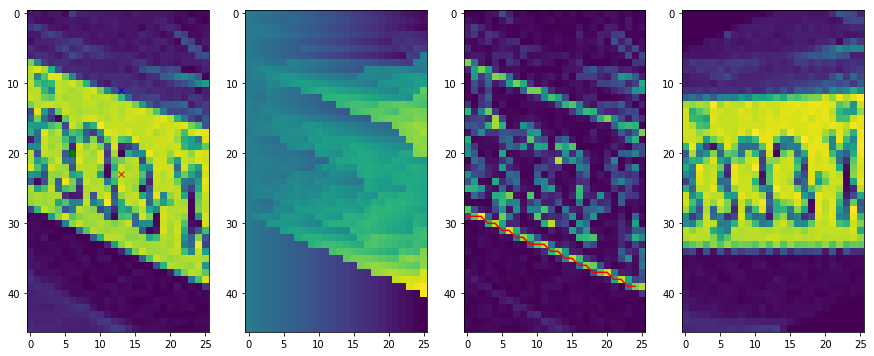

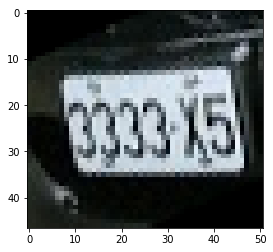

(62, 42)

15
46
14
28
row=41, column=31
24.54309449252557
y=ax+b的 a係數: [[0.2814238]]
y=ax+b的 b截距: [25.48602151]


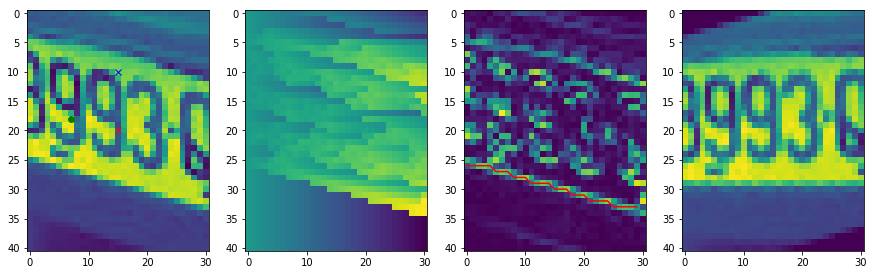

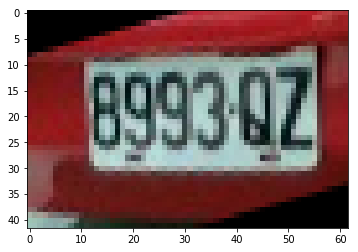

(134, 112)

33
100
37
74
row=111, column=67
10.5119592039801
y=ax+b的 a係數: [[0.20319382]]
y=ax+b的 b截距: [81.97195839]


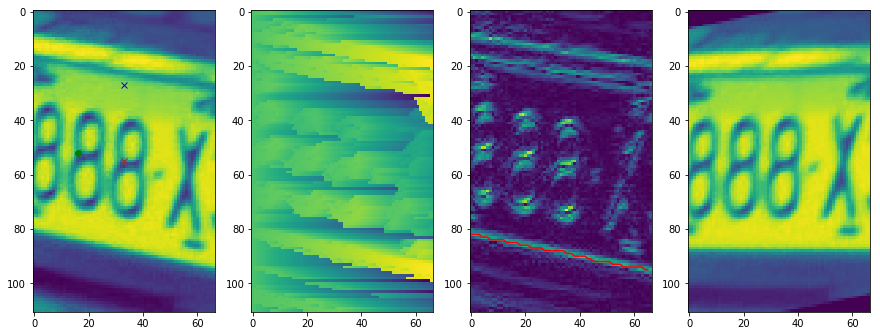

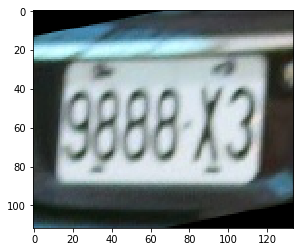

In [156]:
import pandas as pd
import os, sys
import numpy as np
import math
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import Image
import PIL
import s3fs 
from sklearn import datasets,linear_model
import cv2

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def axbFit(x_train,y_train):
    regr=linear_model.LinearRegression()
    regr.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))   
    #r_squared = regr.score(x_train, y_train)
    print('y=ax+b的 a係數:',regr.coef_)
    print('y=ax+b的 b截距:',regr.intercept_ )
    return regr.coef_

def imgWrapA(orgImg,a):
    column=orgImg.shape[1]
    row=orgImg.shape[0]
    #plt.plot( int(column/2),int(row/2),'rx')#fix
    #plt.plot( int(column/2),int(row/4),'bx')#fix
    #plt.plot( int(column/4),int(row/2-column/4*a),'go')#offset
    pts1 = np.float32([[column/2,row/2],[column/2,row/4],[column/4,row/2-column/4*a]])
    pts2 = np.float32([[column/2,row/2],[column/2,row/4],[column/4,row/2]])
    M = cv2.getAffineTransform(pts1,pts2)
    imgWarpAffine = cv2.warpAffine(orgImg,M,(column,row))
    return imgWarpAffine
    

def dpDdecode(img, row, column, side, orgImg):
    
    print("row={}, column={}".format(row, column))
    thread=np.mean(img)
    print(thread)
    reward= np.zeros((row,column),dtype=float)
    prev= np.zeros((row,column),dtype=float)
    #print(prev.shape)
    for j in range(0,row):  # for each reward
        prev[j,0]=0;
        if img[j,0] < thread :
            reward[j,0]=0
        else:
            reward[j,0]=100
        #display(reward[:,0])        

    columnTrace=column
    #columnTrace=4
    for i in range(1, columnTrace):  # for each stage
        for j in range(0,row):  # for each reward
        #for j in range(1,row-1):  # for each reward
            if img[j,i] < thread : # white
                reward[j,i] = reward[j,i-1]-100 
                prev[j,i] =j #debug of edge :0
            else: #black
                #newReward=np.zeros([row],dtype=float)
                
                #newReward=reward[:,i-1]
                newReward=np.array(reward[:,i-1], copy=True)
                #imgstrip=img[:,i]*img[:,i-1]
                #print(imgstrip.size)
                #print('pixel at img[{},{}]'.format)
                #print(newReward)
                down=max(j-side,0)
                up=min(j+side,row)
                for k in range(down,up):
                    #print(abs(img[j,i]-img[k,i-1]))
                    ###########newReward[k]=newReward[k]-abs(img[j,i]-img[k,i-1])#*(abs(k-j)+1)#+abs(j/row-0.5)#-np.count_nonzero(imgstrip[k:j]!=0)/row*1000+ abs(j/row-0.5)
                    #print(newReward[k])
                    ##### good ### newReward[k]=newReward[k]+img[j,i]
                    newReward[k]=newReward[k]+img[j,i]-abs(orgImg[j,i]-orgImg[k,i-1])
                #print(newReward[down:up])
                relativeMaxIndex=np.argmax(newReward[down:up])
                maxreward=newReward[relativeMaxIndex+down]
                #print('{},{} : maxreward={}'.format(i,j,maxreward))
                reward[j,i] = maxreward
                prev[j,i] = relativeMaxIndex+down
    

                
    # traceback
    #display(reward[:,columnTrace-1])        
    finalMaxIndex=np.argmax(reward[:,columnTrace-1])
    #display(reward[finalMaxIndex,columnTrace-1])
    tmpIndex=finalMaxIndex
    #print(finalMaxIndex)
    data_r=np.zeros(columnTrace)
    data_r[columnTrace-1]=row-tmpIndex

        
    for i in range(columnTrace-1, 0, -1):  # for each stage
        #print(tmpIndex)
        #print(reward[tmpIndex,i])
        tmpIndex=int(prev[tmpIndex,i])
        #data_r[i-1]=row-tmpIndex
        data_r[i-1]=tmpIndex
    
    a=axbFit(np.arange(len(data_r)-1),data_r[:-1])
    
    
    #rows,cols = img.shape[:2]
    #pts1 = np.float32([[50,50],[200,50],[50,200]])
    #pts2 = np.float32([[10,100],[200,50],[100,250]]) 
    #M = cv2.getAffineTransform(pts1,pts2)
    #res = cv2.warpAffine(img,M,(rows,cols))
    
    plt.subplots(1,4,figsize=(15,10))
    plt.subplot(1,4,1)
    plt.plot( int(column/2),int(row/2),'rx')#fix
    plt.plot( int(column/2),int(row/4),'bx')#fix
    plt.plot( int(column/4),int(row/2-column/4*a),'go')#offset
    #pts1 = np.float32([[column/2,row/2],[column/2,row/4],[column/4,row/2-column/4*a]])
    #pts2 = np.float32([[column/2,row/2],[column/2,row/4],[column/4,row/2]])
    #M = cv2.getAffineTransform(pts1,pts2)
    #imgWarpAffine = cv2.warpAffine(orgImg,M,(column,row))
    imgWarpAffine=imgWrapA(orgImg,a)
    
    
    plt.imshow(orgImg)
    plt.subplot(1,4,2)
    plt.imshow(reward)
    plt.subplot(1,4,3)
    plt.imshow(img)
    plt.plot(data_r[:-1],'r')
    plt.subplot(1,4,4)
    plt.imshow(imgWarpAffine)    
    plt.show()
    return data_r, a


def lp_parser(path,rowOffset, columnOffset, h, w):
    im = Image.open(path)
    #display(im)
    display(im.size)
    pix_color = np.array(im)
    pix_gray = rgb2gray(pix_color)
    left=int(im.size[0]/4)
    print(left)
    
    right=int(3*im.size[0]/4)
    print(right)
  
    top=int(im.size[1]/3)
    print(top)
    
    down=int(2*im.size[1]/3)
    print(down)
    
    cropGrayLR=np.abs(pix_gray[0:-1,left:right]-pix_gray[1:,left:right])
    waveLR, a=dpDdecode(cropGrayLR,cropGrayLR.shape[0],cropGrayLR.shape[1],2, pix_gray[1:,left:right])
    imWrap=imgWrapA(pix_color,a)
    plt.imshow(imWrap)
    plt.show()
    
    cropGrayTD=np.abs(pix_gray[top:down,0:-1]-pix_gray[top:down,1:])
    #cropGrayTD_t=cropGrayTD.transpose()
    #waveLR=dpDdecode(cropGrayTD_t,cropGrayTD_t.shape[0],cropGrayTD_t.shape[1],2, pix_gray[top:down,1:].transpose())
    #axbFit(np.arange(len(waveLR)-1),waveLR[:-1])

    
    
    return waveLR,pix_gray[0:-1,left:right],a, imWrap
testPath='img/0_1111E2_1.jpg'
testPath='img/0_3333X5_1.jpg'
lpRect_s=[]
pix_gray_s=[]
imWrap_s=[]
for root,unkown,fNames in os.walk('img'):
    for f in fNames:
        strFpath="img/{}".format(f)
        lpRect, pix_gray, a, imWrap=lp_parser(strFpath, 413, 178, 472, 737)
        lpRect_s.append(lpRect)
        pix_gray_s.append(pix_gray)
        imWrap_s.append(imWrap)
        



22


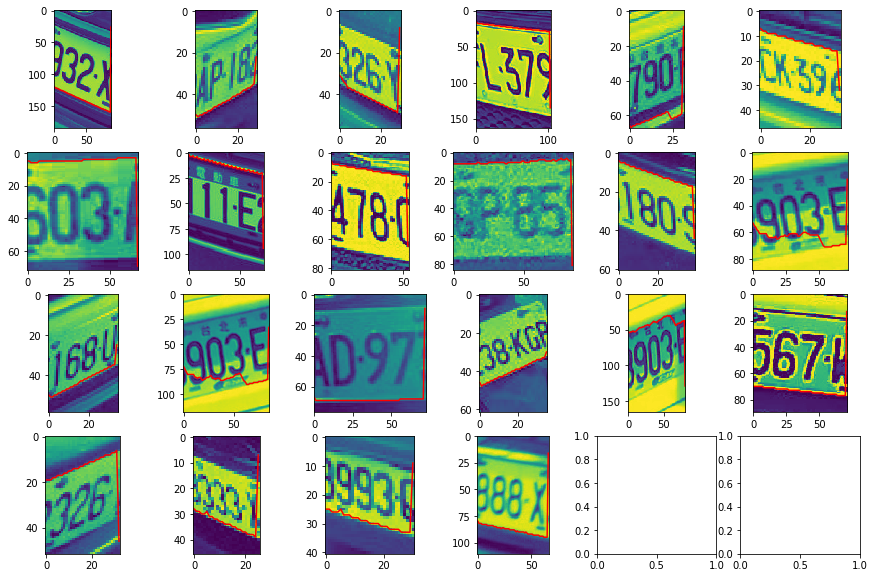

In [93]:
print(len(lpRect_s))
#pix_gray_s
plt.subplots(4,6,figsize=(15,10))
    
for ii in range(0,len(lpRect_s)):
    plt.subplot(4,6,ii+1)
    #print(lpRect_s[ii])
    plt.plot(lpRect_s[ii],'r')
    plt.imshow(pix_gray_s[ii])
    
plt.show()

22


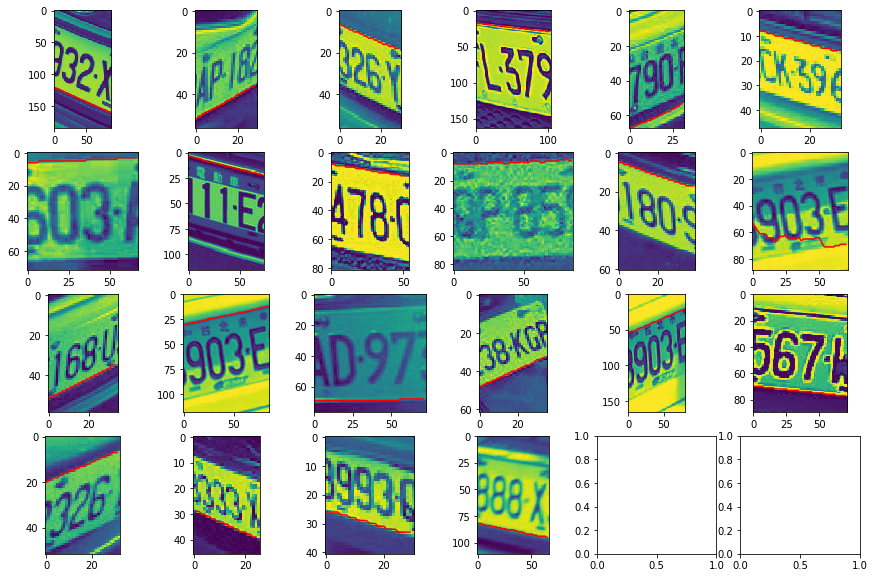

In [104]:
print(len(lpRect_s))
#pix_gray_s
plt.subplots(4,6,figsize=(15,10))
    
for ii in range(0,len(lpRect_s)):
    plt.subplot(4,6,ii+1)
    #print(lpRect_s[ii])
    plt.plot(lpRect_s[ii][:-1],'r')
    plt.imshow(pix_gray_s[ii])
    
plt.show()

22


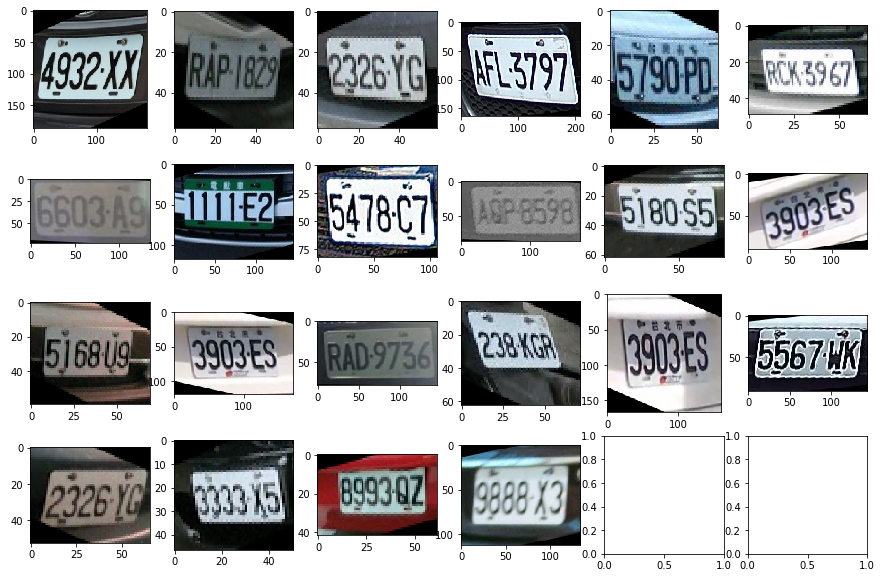

In [159]:
print(len(imWrap_s))
#pix_gray_s
plt.subplots(4,6,figsize=(15,10))
    
for ii in range(0,len(imWrap_s)):
    plt.subplot(4,6,ii+1)
    plt.imshow(imWrap_s[ii])
    
plt.show()